In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [63]:
DUNEblue = '#7FAED5'
DUNElightOrange = '#F19E54'
DUNEdarkOrange = '#F0652B'
DUNEgreen = '#8ACA6F'
DUNEgray = '#626466'
DUNEyellow = '#FBD03F'
DUNEpurple = '#5B3069'
DUNElightPurple = '#8C6E96'
DUNEcyan = '#42C2A8'
DUNEpink = '#F7AEC2'

DUNEcolors = [DUNEblue,
              DUNElightOrange,
              DUNEdarkOrange,
              DUNEgreen,
              DUNEgray,
              DUNEyellow,
              DUNEpurple,
              DUNElightPurple,
              DUNEcyan,
              DUNEpink]

matplotlib.rc('font', family = 'FreeSerif', size = 16, weight = 'bold')
matplotlib.rc('text', usetex = True)
matplotlib.rc('axes', prop_cycle = matplotlib.cycler(color = DUNEcolors))

def quadr_sum(*args):
    return np.sqrt(sum(np.power(args, 2)))

Text(0, 0.5, 'Current [mA]')

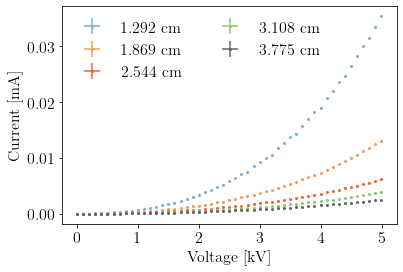

In [64]:
### MSU TLM Plot 1: voltage vs. current

data = [{"file": "MSU_TLM_data/sample2.dat",
         "label": r'1.292 cm'},
        {"file": "MSU_TLM_data/sample4.dat",
         "label": r'1.869 cm'},
        {"file": "MSU_TLM_data/sample1.dat",
         "label": r'2.544 cm'},
        {"file": "MSU_TLM_data/sample5.dat",
         "label": r'3.108 cm'},
        {"file": "MSU_TLM_data/sample3.dat",
         "label": r'3.775 cm'},]

fig = plt.figure()
ax = fig.gca()

for item in data:
    V, dV, I, dI = np.loadtxt(item["file"], 
                              delimiter = ',', 
                              skiprows = 1).T
    
    V /= 1000 # voltage in kV
    dV /= 1000
    
    I /= 1000 # current in mA
    dI /= 1000
    
    ax.errorbar(V, I,
                xerr = dV,
                yerr = dI,
                ls = "none",
                fmt = 'o',
                ms = 2,
                label = item["label"])
    
ax.legend(ncol = 2, frameon = False)
ax.set_xlabel(r'Voltage [kV]')
ax.set_ylabel(r'Current [mA]')

<ipython-input-67-af829aa6499e>:38: RuntimeWarning: invalid value encountered in true_divide
  dE = E*quadr_sum(dV/V, dL/L)
<ipython-input-63-cc40dbe325fe>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.sqrt(sum(np.power(args, 2)))
<ipython-input-67-af829aa6499e>:41: RuntimeWarning: invalid value encountered in true_divide
  dSqrtE = sqrtE*quadr_sum(0.5*dV/V, 0.5*dL/L)
<ipython-input-67-af829aa6499e>:44: RuntimeWarning: invalid value encountered in true_divide
  dR = R*quadr_sum(dV/V, dI/I)


[]

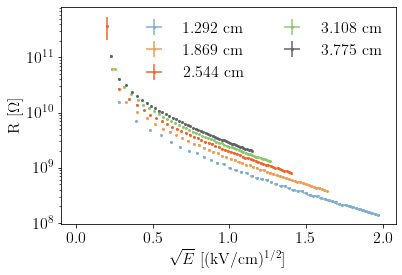

In [67]:
### MSU TLM Plot 2: sqrt(E) vs. resistance

data = [{"file": "MSU_TLM_data/sample2.dat",
         "length": 1.292,
         "label": r'1.292 cm'},
        {"file": "MSU_TLM_data/sample4.dat",
         "length": 1.869,
         "label": r'1.869 cm'},
        {"file": "MSU_TLM_data/sample1.dat",
         "length": 2.544,
         "label": r'2.544 cm'},
        {"file": "MSU_TLM_data/sample5.dat",
         "length": 3.108,
         "label": r'3.108 cm'},
        {"file": "MSU_TLM_data/sample3.dat",
         "length": 3.775,
         "label": r'3.775 cm'},]

dL = 0.025

fig = plt.figure()
ax = fig.gca()

for item in data:
    V, dV, I, dI = np.loadtxt(item["file"], 
                              delimiter = ',', 
                              skiprows = 1).T
    
    V /= 1000 # voltage in kV
    dV /= 1000
    
    I /= 1000 # current in mA
    dI /= 1000
    
    L = item["length"]
    
    E = V/item["length"]
    dE = E*quadr_sum(dV/V, dL/L)
    
    sqrtE = np.sqrt(E)
    dSqrtE = sqrtE*quadr_sum(0.5*dV/V, 0.5*dL/L)
    
    R = V/I # resistance in MOhm
    dR = R*quadr_sum(dV/V, dI/I)
    
    R *= 1.e6 # resistance in Ohm
    dR *= 1.e6
    
    ax.errorbar(sqrtE, R,
                xerr = dSqrtE,
                yerr = dR,
                ls = "none",
                fmt = 'o',
                ms = 2,
                label = item["label"])
    
ax.legend(ncol = 2, frameon = False)
ax.set_xlabel(r'$\sqrt{E}$ [(kV/cm)$^{1/2}$]')
ax.set_ylabel(r'R [$\Omega$]')
plt.semilogy()